# Enron K-Means Clustering

* Megan Silvey April 2019

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

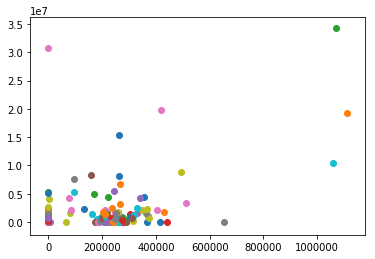

In [5]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2)
plt.show()

In [6]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
kmeans = KMeans(n_clusters=2).fit(finance_features)
pred = kmeans.predict(finance_features)
print("Prediction: ", pred)
print("Silhouette is: ", silhouette_score(finance_features, pred))

Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette is:  0.8880958238199448


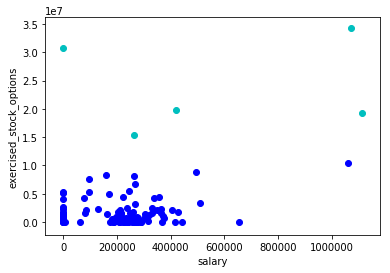

In [7]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")
    
stock = [item["exercised_stock_options"]for key,item in data_dict.items() if item["exercised_stock_options"]!= "NaN"]

In [8]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

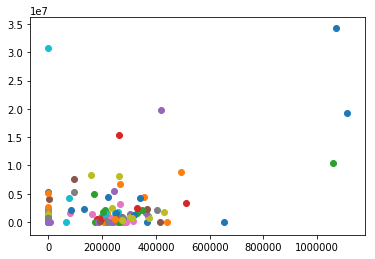

In [9]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2)
plt.show()

In [10]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
kmeans = KMeans(n_clusters=3).fit(finance_features)
pred = kmeans.predict(finance_features)
print("Prediction: ", pred)
print("Silhouette is: ", silhouette_score(finance_features, pred))

Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette is:  0.8254236286865029


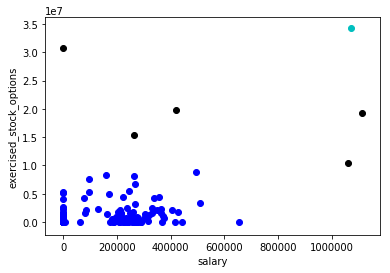

In [11]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")
    
stock = [item["exercised_stock_options"]for key,item in data_dict.items() if item["exercised_stock_options"]!= "NaN"]

In [12]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
feature_4 = "expenses"
feature_5 = "total_stock_value"
feature_6 = "bonus"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [13]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
kmeans = KMeans(n_clusters=3).fit(finance_features)
pred = kmeans.predict(finance_features)
print("Prediction: ", pred)
print("Silhouette is: ", silhouette_score(finance_features, pred))

Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette is:  0.8336533938321156


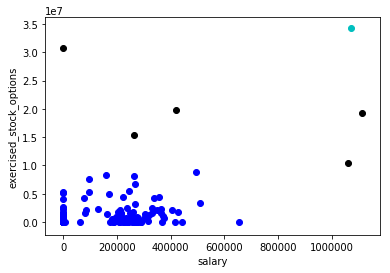

In [14]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")
    
stock = [item["exercised_stock_options"]for key,item in data_dict.items() if item["exercised_stock_options"]!= "NaN"]

In [15]:
a = [float(values['exercised_stock_options']) for values in data_dict.values()]
print('Maximum value: {0} \nMinimum value: {1}'.format(np.nanmax(a),np.nanmin(a)))

Maximum value: 34348384.0 
Minimum value: 3285.0


In [16]:
b = [float(values['salary']) for values in data_dict.values()]
print('Maximum value: {0} \nMinimum value: {1}'.format(np.nanmax(b),np.nanmin(b)))

Maximum value: 1111258.0 
Minimum value: 477.0
